In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
db = pd.read_csv('smiles_prop.txt', sep='\t', header=None)

In [38]:
db = db.rename(columns={0: 'Smiles',
                        1: 'Molecular Weight',
                        2: 'LogP',
                        3: 'NumHeteroAtoms',
                        4: 'NumAromaticRings',
                        5: 'NumAliphaticRings',
                        6: 'NumPrimaryAmines',
                        7: 'NumAromaticNitrogens',
                        8: 'NumPyridines'})

In [39]:
db

,Smiles,Molecular Weight,LogP,NumHeteroAtoms,NumAromaticRings,NumAliphaticRings,NumPrimaryAmines,NumAromaticNitrogens,NumPyridines
0,C[C@@]1(c2ccccc2)OC(C(=O)[O-])=CC1=O,217.050632,0.13490,4,1,1,0,0,0
1,O=C(C[S@@](=O)C(c1ccccc1)c1ccccc1)NO,289.077264,2.03010,5,2,0,0,0,0
2,CCC[S@](=O)c1ccc2[nH]/c(=N/C(=O)OC)[nH]c2c1,281.083412,1.68070,7,2,0,0,2,0
3,CCC[S@](=O)c1ccc2[nH]/c(=N\C(=O)OC)[nH]c2c1,281.083412,1.68070,7,2,0,0,2,0
4,C=CCN1C(=O)[C@@H](CC(C)C)NC1=S,212.098334,1.30380,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
550878,Clc1ccc2c(NCCCN3CCC(NC(c4ccccn4)c4ccccn4)CC3)c...,486.229873,5.32380,7,4,1,0,3,3
550879,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCCCC3)c3...,461.279075,4.34124,7,3,2,0,3,3
550880,COc1ncc(C(=O)Nc2c(Cl)c[n+]([O-])cc2Cl)c2cc(-c3...,430.023560,4.09090,10,4,0,0,3,3
550881,CCC1(O)CC(=O)OCc2c1cc1n(c2=O)Cc2c-1nc1ccc(Cl)c...,488.137160,3.45890,8,4,2,0,3,3


In [22]:
db.describe()

,MW,LogP,NumHeteroAtoms,NumAromaticRings,NumAliphaticRings,NumPrimaryAmines,NumAromaticNirtogens,NumPyridines
count,550883.000000,550883.000000,550883.000000,550883.000000,550883.000000,550883.000000,550883.000000,550883.000000
mean,335.087242,3.054047,6.175210,2.253613,0.638003,0.159174,1.032127,0.230753
std,70.793228,1.405057,2.022788,0.952208,0.762773,0.466661,1.366158,0.558566
min,32.037448,-15.092600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,287.115758,2.255610,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,334.002431,3.240220,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,385.126026,4.054840,7.000000,3.000000,1.000000,0.000000,2.000000,0.000000
max,499.409755,11.070400,19.000000,9.000000,9.000000,3.000000,11.000000,4.000000


In [40]:
columns = list(db.columns)[1:]
columns

['Molecular Weight',
 'LogP',
 'NumHeteroAtoms',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumPrimaryAmines',
 'NumAromaticNitrogens',
 'NumPyridines']

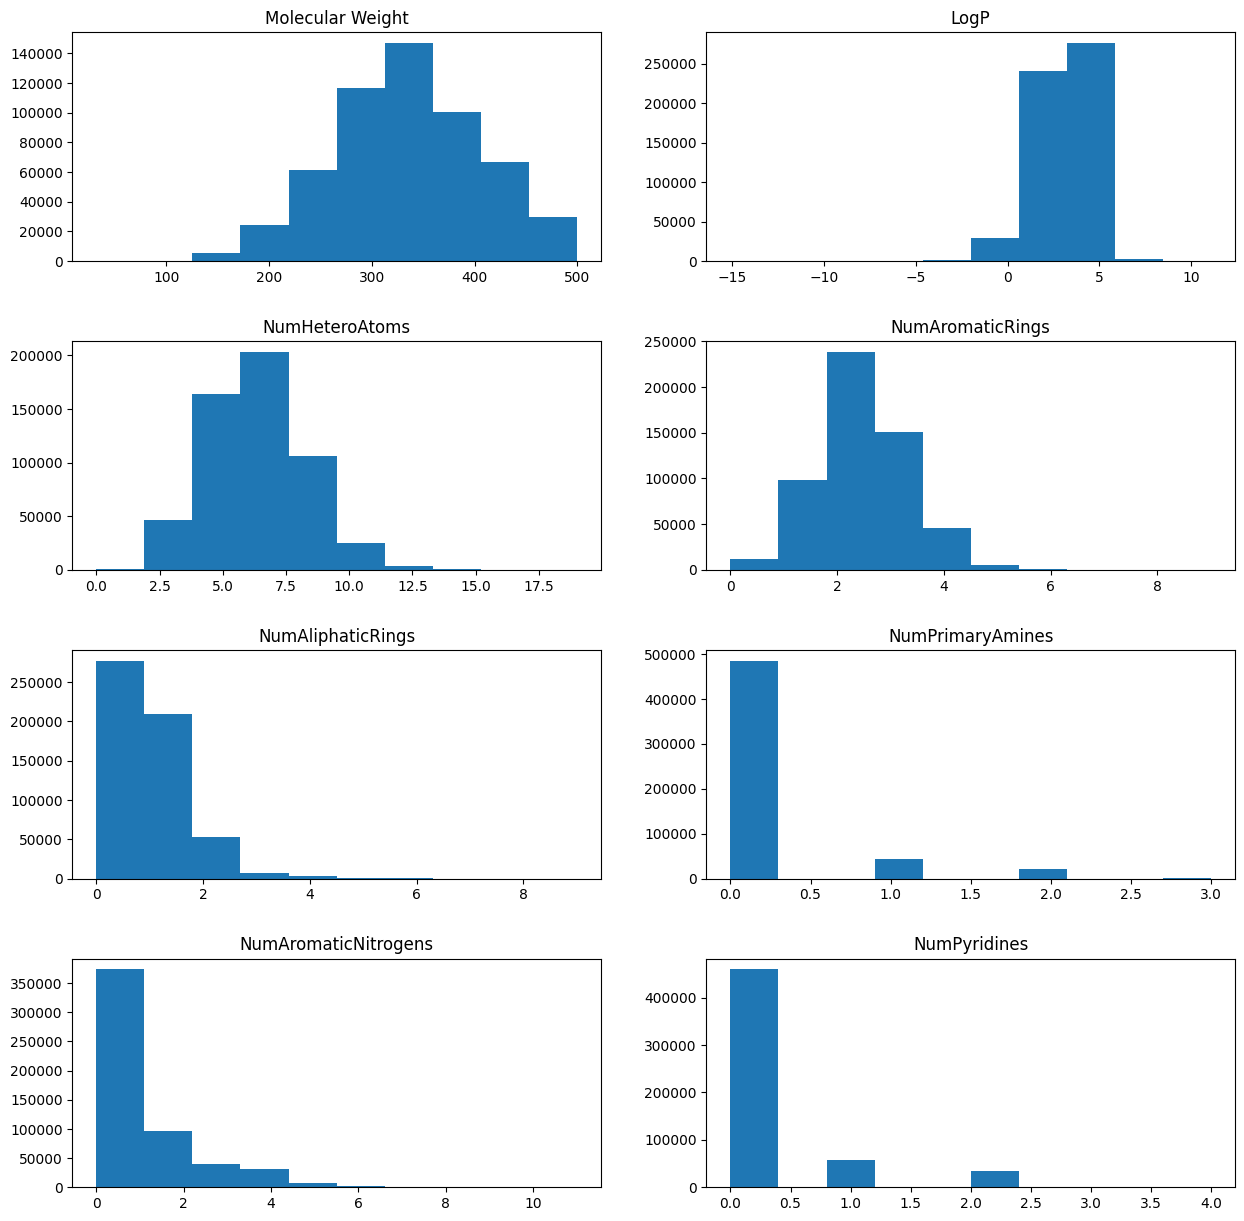

In [50]:
fig, axs = plt.subplots(4, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(db['Molecular Weight'])
axs[0,0].set_title("Molecular Weight")

axs[0,1].hist(db['LogP'])
axs[0,1].set_title("LogP")

axs[1,0].hist(db['NumHeteroAtoms'])
axs[1,0].set_title("NumHeteroAtoms")

axs[1,1].hist(db['NumAromaticRings'])
axs[1,1].set_title("NumAromaticRings")

axs[2,0].hist(db['NumAliphaticRings'])
axs[2,0].set_title("NumAliphaticRings")

axs[2,1].hist(db['NumPrimaryAmines'])
axs[2,1].set_title("NumPrimaryAmines")

axs[3,0].hist(db['NumAromaticNitrogens'])
axs[3,0].set_title("NumAromaticNitrogens")

axs[3,1].hist(db['NumPyridines'])
axs[3,1].set_title("NumPyridines")

fig.subplots_adjust(hspace=0.35)


In [2]:
from utils import *
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcNumAromaticRings
from rdkit.Chem.rdMolDescriptors import CalcNumHeteroatoms
from rdkit.Chem.rdMolDescriptors import CalcNumAliphaticRings
from rdkit.Chem.Fragments import fr_NH2, fr_Ar_N, fr_pyridine

In [4]:
m = Chem.MolFromSmiles('C1=CC(=CC=C1C2=CN=CN2)Cl')
AllChem.Compute2DCoords(m)
string_mol_properties(m)

'178.029775904 2.7301 3 2 0 0 2 0'

In [5]:
files = os.listdir('results')

In [18]:
df = pd.read_csv(f'results/{files[0]}', sep='\t')


In [19]:
for file in files[1:]:
    f = pd.read_csv(f'results/{file}', sep='\t')
    df = pd.concat([df,f], ignore_index=True)

/tmp/ipykernel_6669/1322411378.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,f], ignore_index=True)
/tmp/ipykernel_6669/1322411378.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,f], ignore_index=True)
/tmp/ipykernel_6669/1322411378.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To re

In [21]:
df.to_csv('for_pca.csv')

In [27]:
latent = pd.read_csv('lanent.txt', sep='\t')

In [30]:
latent.iloc[0].latent

'[[ 0.7587471   1.5827982   1.1785556  -1.9376124  -1.9104149   0.5031491'

In [79]:
with open('lanent.txt') as f:
    smiles = f.read().split('\t')[1:]

In [80]:
def remove_n(line):
    split_text = line.split("\n")
    clean_text = "".join(split_text)
    return clean_text

In [81]:
out_smiles = [remove_n(line) for line in smiles]

In [82]:
out_smiles[0] = out_smiles[0][6:]

In [84]:
len(out_smiles)

7159

In [97]:
vec, smiles = [], []
for i in range(len(out_smiles)):
    if i%2:
        vec.append(out_smiles[i])
    else:
        smiles.append(out_smiles[i])
    i+=1

In [100]:
vec[0]

'[[ 0.7587471   1.5827982   1.1785556  -1.9376124  -1.9104149   0.5031491   1.5492595   0.52485037 -0.6989232  -0.444183    2.050428   -0.72357327  -0.36978203  0.5037976   0.34857976 -0.5284264   1.4077262  -1.2467104  -0.363412    0.23156163  0.43499106  0.7589812  -0.4157531  -1.7152791   0.15618867 -2.1846497   0.04895487 -0.40759403 -0.7018908   0.11639082  -0.7741357  -0.03525191  1.1068012   0.04310712 -0.46753916 -1.2580225  -0.24411914  0.59067345  0.08084228 -0.7821664   2.0522306  -0.10322581   0.67035884  1.4924358   0.24754089  1.7014856  -0.9861835  -2.1787162  -0.8979468  -1.32756     0.62122154  0.8222687  -0.36160251 -0.4516333   0.51967835  0.44995576 -0.15145281  0.04160906  2.5303068   0.546813   0.13923037  0.8471933  -0.60114586 -0.00955618 -1.7062358  -2.695616  -0.70639163 -0.94478565 -0.5040531   0.5619843  -1.5763546   1.6610206   0.7709158  -0.548974   -1.2865597   0.53435165  0.98362684  0.90683514  -0.5861981  -1.147933    0.3402257  -0.03091227  0.8934208 

In [114]:
def extract_numbers_from_str(input_str):
    # Remove unwanted characters and split the string by spaces
    numbers = input_str.replace('[', '').replace(']', '').split()

    # Convert each number to an integer
    num_list = [float(num) for num in numbers]

    return num_list


[1.0, 2.0, 3.0]


In [119]:
fin_vec = np.array([extract_numbers_from_str(vector) for vector in vec])

In [120]:

from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(fin_vec)
plot = plt.scatter(Xt[:,0], Xt[:,1])

In [132]:
def get_mw(string):
    m = Chem.MolFromSmiles(string)
    AllChem.Compute2DCoords(m)
    return ExactMolWt(m)

def get_logp(string):
    m = Chem.MolFromSmiles(string)
    AllChem.Compute2DCoords(m)
    return MolLogP(m)

In [133]:
mw = [get_mw(mol) for mol in smiles]
logp = [get_logp(mol) for mol in smiles]

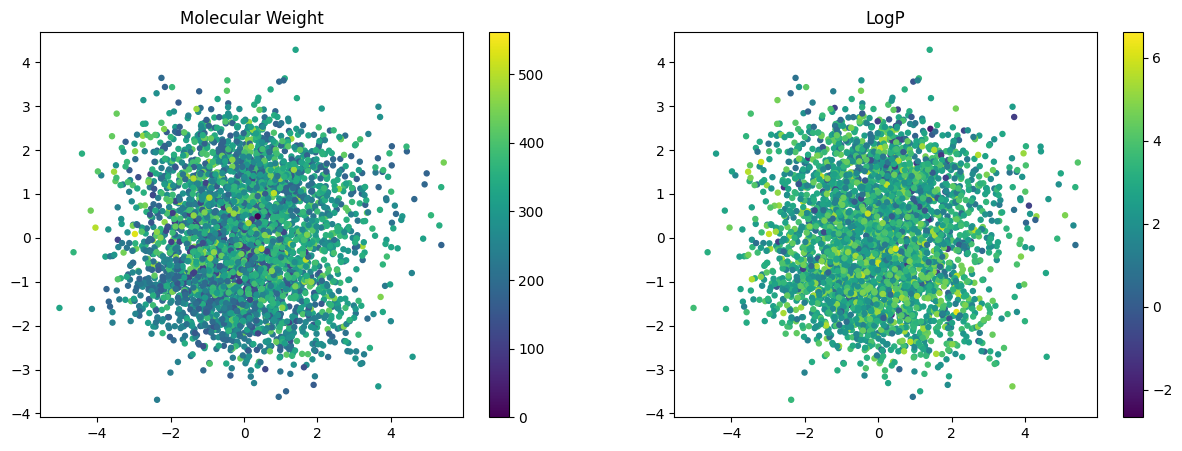

In [152]:
fig, axs = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)

im1=axs[0].scatter(Xt[:,0], Xt[:,1], c=mw[1:], s=13)
axs[0].set_title("Molecular Weight")
plt.colorbar(im1, ax=axs[0])

im2=axs[1].scatter(Xt[:,0], Xt[:,1], c=logp[1:], s=13)
axs[1].set_title("LogP")
plt.colorbar(im2, ax=axs[1])
#plot = plt.scatter(Xt[:,0], Xt[:,1], c=mw[1:], s=13)
#plt.colorbar()

In [157]:
db = pd.read_csv('for_pca.csv')

In [159]:
db.smiles

0           COc1cccc(N2C[C@@H]([NH+]3CCc4ccccc43)CC2=O)c1
1             COc1ccc(-c2nn(C3CCCC3)c(=O)c3ccccc23)c(O)c1
2        COc1cccc(N2C(=O)[C@H]3C[C@]4(C)C3=CC=CC=CN24)c1O
3         COc1ccccc1N1C(=O)[C@@H]2C[C@@]1(O)c1ccc(Cl)cc12
4       COc1ccccc1[C@@H]1C(=O)NC(c2ccc(F)cc2)=C([O-])C1=O
                              ...                        
3586                  CC(C)c1ccc(C(N)Cc2ccccc2)c([N-])c1N
3587                      CC(C)(C)c1ccccc1C(=O)NCc1cccnc1
3588                     CC(C)(C)c1ccccc1C(=O)NCc1cccnc1N
3589                 CC(C)c1ccc(C(N)CCc2ccccc2)c([N-])c1N
3590                     CCOc1ccc(O)c(CCC(N)=Cc2ccccc2)c1
Name: smiles, Length: 3591, dtype: object

In [161]:
ff = pd.read_csv('../TransformerM/predictions.csv')

In [187]:
smiles = ff[(ff.cls==1.0)&(ff.regr>45)].smiles.to_list()

In [180]:
len(smiles)

365

In [181]:
import numpy as np
from rdkit.Chem import  Draw
import os
import rdkit.Chem as Chem

In [193]:
redsmiles = [Chem.MolFromSmiles(s) for s in smiles[300:350]]

img=Draw.MolsToGridImage(redsmiles,molsPerRow=6,subImgSize=(700,700),returnPNG=False)
img.save('final350.png')

In [170]:
smiles

['CC1=CC2=NC(c3ccco3)=NC2=NC1=O',
 'CC1=CC2=NC(NCc3ccco3)=NC2=N1',
 'Cc1cc2nc(NCc3ccco3)ncn2c1',
 'Cc1nc2ccc(Nc3ccco3)nc2n1[O-]',
 'COC(=O)c1ccc2nc3cc(C)sn3c2n1',
 'Cc1cccc(NC(=O)c2ccc(F)c(C)c2)c1',
 'Cc1cccc(C(=O)Nc2ccc(F)cc2)c1C',
 'CC(=O)Nc1nnc(-c2nnc(-c3ccccc3)o2)c2ccccc12',
 'COC(=O)c1cnn(-c2ccccc2)c1-c1noc2ccc(Cl)cc12',
 'CNc1cc(Br)ccc1C',
 'CC(C)c1cc([N-])c2cc(N)oc2c1',
 'COc1c(C)ccc(-c2cc(C)nc3ccc(Br)cc23)c1OC',
 'Cc1ccc2nc(-c3ccc(Br)cc3)c(=O)oc2c1C#N',
 'Cc1ccc(-c2cc(C(=O)NCc3ccccc3)no2)cc1Br',
 'Cc1cc(-c2ccc(C)c(OC(=O)[O-])c2)c2cc(Br)ccc2n1',
 'Cc1ccc(Nc2nc(-c3ccccc3)no2)c(C)c1',
 'Cc1ccc(-c2cc(C(=O)Nc3ccccc3C)nc(C)n2)cc1',
 'Cc1cc(C)c(C(=O)Nc2nc(-c3ccccc3)ccc2C)c(C)n1',
 'Cc1ccc(-c2nc(-c3ccc(Br)cc3)cc(=O)[nH]2)cc1',
 'Cc1cccc(-c2nnc(N3CCOCC3)nc3ncnc2-3)c1',
 'Cc1ccccc1NC(=O)c1ccc(Cl)cc1C(=O)Nc1ccco1',
 'Cc1ccc(Cl)cc1NC(=O)COc1ccc2c(c1)OCO2',
 'c1cc2ccc3sccn3c-2n1',
 'NC1=c2ccc3c(c2N=C1)C=CC=3',
 'C1=Cc2c3c(ccc2=C1)=CC=N3',
 'c1c[nH]c2c3ncccc3cc-2c1',
 'c1cnc2c(c1)ccc1occc12'